In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [2]:
nbits = 2

In [3]:
# operand qregisters
p = QuantumRegister(nbits, 'p')
q = QuantumRegister(nbits, 'q')
cin = QuantumRegister(nbits, 'cin')
o = QuantumRegister(1, 'o') # scratch register holding cout from each operation. init to 0
# measure cregisters
pprime = ClassicalRegister(nbits, "p'")
qprime = ClassicalRegister(nbits, "q'")
cinprime = ClassicalRegister(1, "cin'")
res = ClassicalRegister(nbits+1, "res = sum + cout")

circ = QuantumCircuit(p, q, cin, o, pprime, qprime, cinprime, res)

In [4]:
# superpos p, q and cin[0]
circ.h(p)
circ.h(q)
circ.h(cin[0])
circ.barrier(p, q, cin)
circ.measure(cin[0], cinprime)
circ.barrier(p, q, cin)

In [5]:
# operation loop
# loop each qbit and compute the sum and carry
for i in range(nbits):
    circ.ccx(p[i], q[i], o)
    circ.cx(p[i], q[i])
    circ.ccx(q[i], cin[i], o)
    circ.cx(q[i], cin[i])
    circ.cx(p[i], q[i])
    if i+1 < nbits:
        circ.swap(o, cin[i+1])
    circ.barrier()
circ.measure(p, pprime)
circ.measure(q, qprime)
circ.measure(cin, res[:nbits])
circ.measure(o, res[-1])

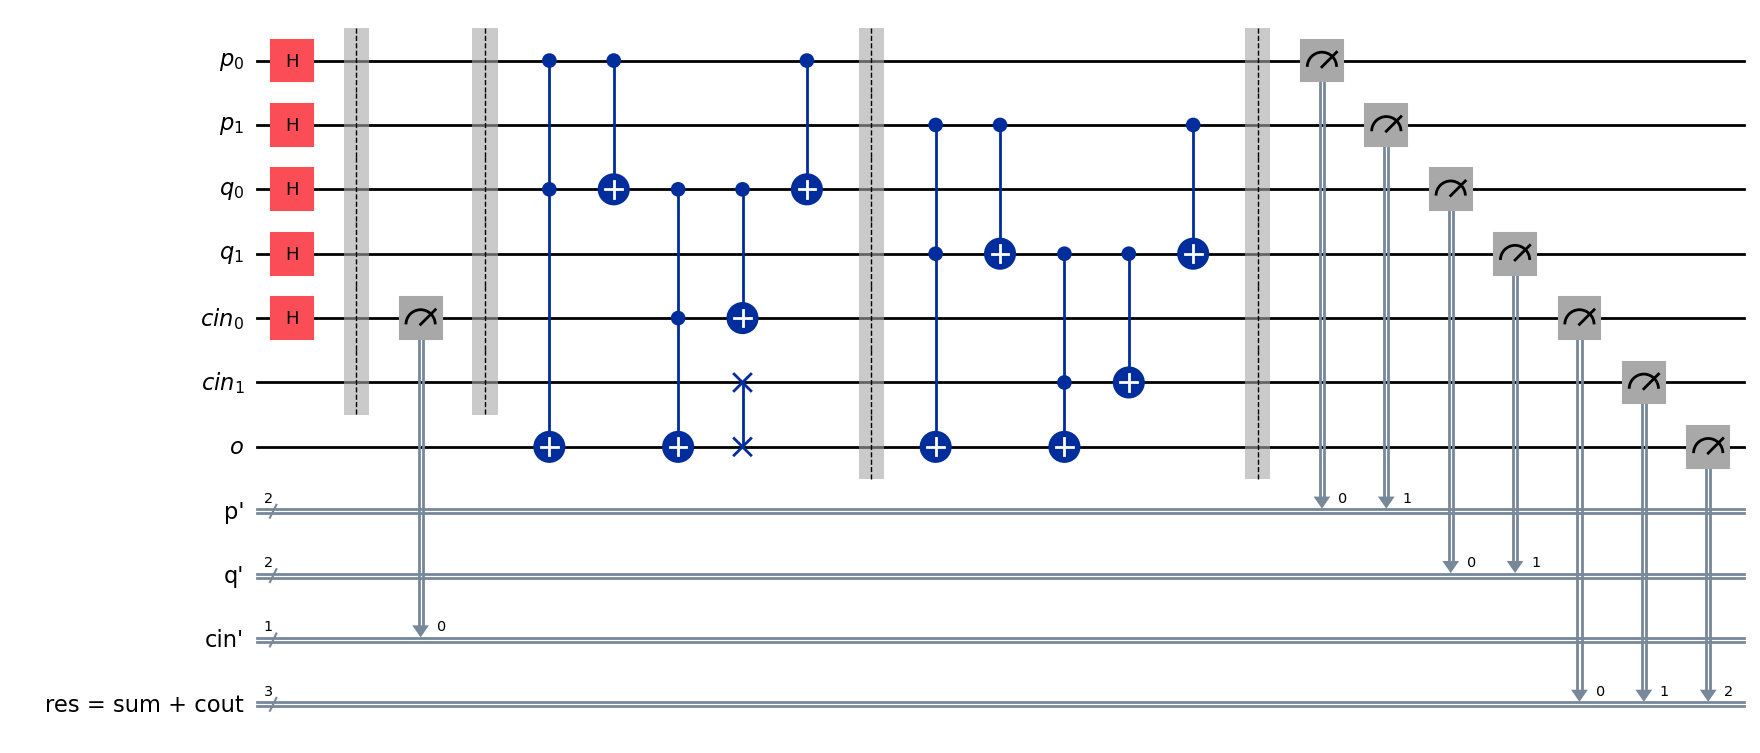

In [6]:
from qiskit.visualization import circuit_drawer
circuit_drawer(circ, output='mpl', fold=-1, filename='full_add.pdf')

In [7]:
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [8]:
backend = Aer.get_backend('qasm_simulator')
result = backend.run(circ).result()

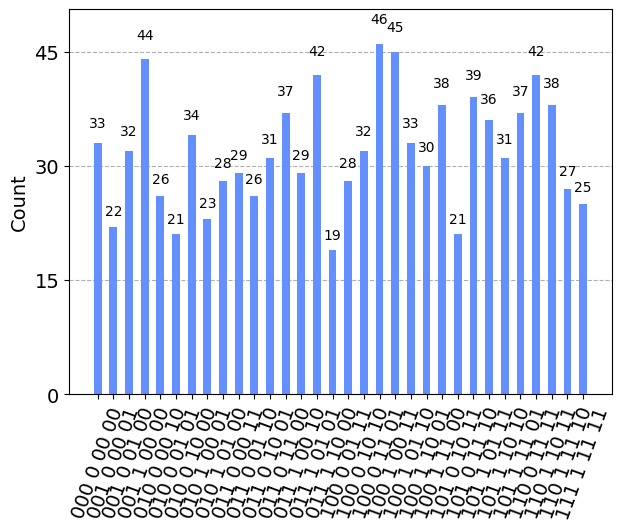

In [9]:
plot_histogram(result.get_counts())